# Normalized Inter-Class Variance (NICV) Analysis

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

import sys
sys.path.insert(0, '/home/lcastellazzi/MDM32/src/utils')
from preprocessing import TraceHandler
from nicv import nicv
import constants

## Preprocessing

### Get Data

In [2]:
paths = {'D1_K1': '/prj/side_channel/PinataTraces/CURR/D1-K1_50k_500MHz + Resampled at 168MHz.trs',
         'D1_K1_extra': '/prj/side_channel/PinataTraces/CURR/D1-K1_50k_500MHz (NICV) + Resampled at 168MHz.trs',
         'D1_K2': '/prj/side_channel/PinataTraces/CURR/D1-K2_50k_500MHz + Resampled at 168MHz.trs',
         'D1_K3': '/prj/side_channel/PinataTraces/CURR/D1-K3_50k_500MHz + Resampled at 168MHz.trs',
         'D2_K1': '/prj/side_channel/PinataTraces/CURR/D2-K1_50k_500MHz + Resampled at 168MHz.trs',
         'D2_K2': '/prj/side_channel/PinataTraces/CURR/D2-K2_50k_500MHz + Resampled at 168MHz.trs', 
         'D2_K3': '/prj/side_channel/PinataTraces/CURR/D2-K3_50k_500MHz + Resampled at 168MHz.trs'}

trace_handlers = {key: TraceHandler(path) for key, path in paths.items()}

100%|██████████| 50000/50000 [00:21<00:00, 2313.73it/s]


### Define all NICV experiments

In [3]:
# Same Device, Same Key at different times
nicv_same_config = ['D1_K1', 'D1_K1_extra']

# Same Device, Different Key
nicv_same_device = {d: [f'{d}_{k}' for k in constants.KEYS] for d in constants.DEVICES}

# Different Device, Same Key
nicv_same_key = {k: [f'{d}_{k}' for d in constants.DEVICES] for k in constants.KEYS}

# All possible Device-Key configurations
nicv_all_config = [f'{d}_{k}' for d in constants.DEVICES for k in constants.KEYS]

### Define a Plot Fuction

In [4]:
def plot_nicv_all_bytes(trace_handlers):
    
    """
    Compute and plot NICV values for each byte.
    
    Parameters:
        - trace_handlers (TraceHandler dict): 
            set of TraceHandlers containing the data to use to 
            compute the NICV
    
    Returns:
        Figure object containing all plots.
    """
    
    f, ax = plt.subplots(4, 4, figsize=(25,25))
    row = 0

    for b in tqdm(range(16)):
    
        col = b % 4
    
        for key, trace_handler in trace_handlers.items():
        
            traces = trace_handler.get_traces()
            plaintexts = trace_handler.get_plaintexts()
        
            nicv_val = nicv(traces, plaintexts, b)
        
            ax[row, col].plot(nicv_val, label=key)
            ax[row, col].legend()
            ax[row, col].set_title(f'Byte {b}')
    
        if col == 3:
            row += 1

    plt.show()
    
    return f

## NICV - Same Device-Key configuration at two different times 

100%|██████████| 16/16 [00:07<00:00,  2.01it/s]


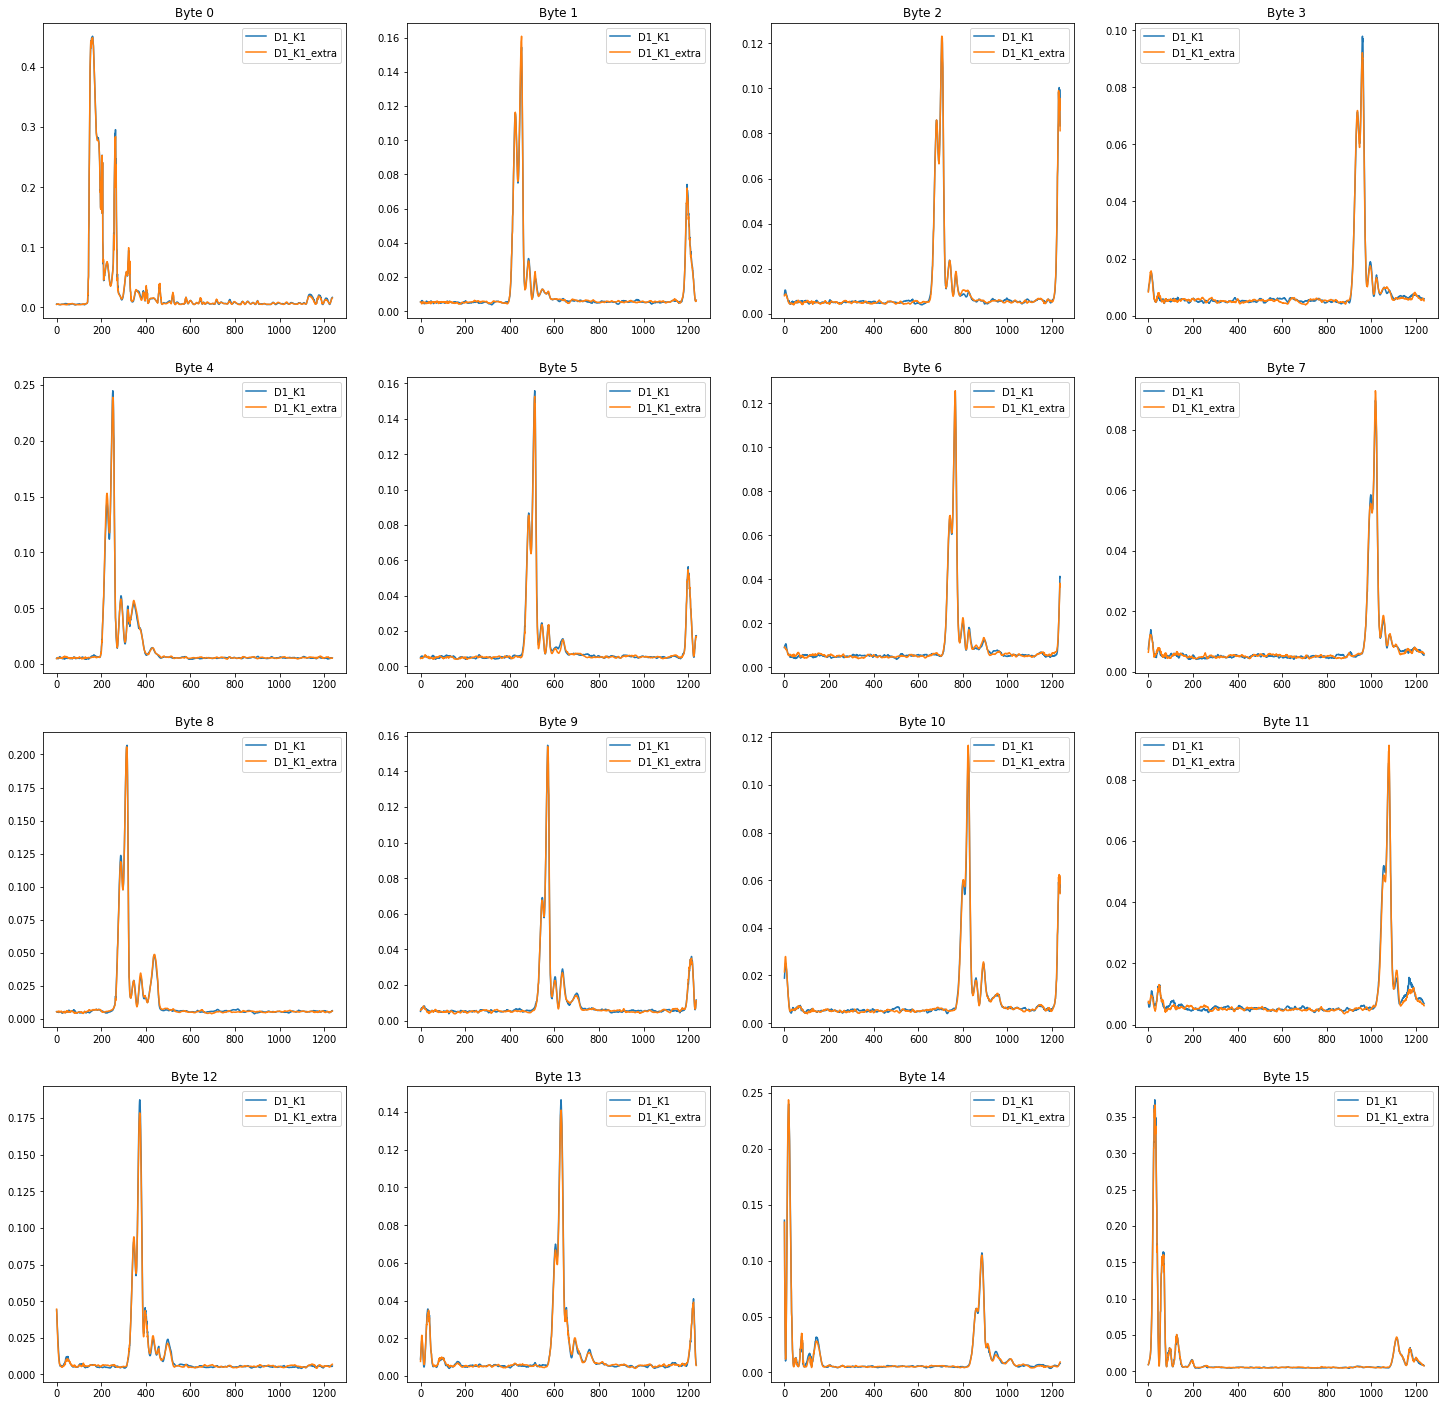

In [5]:
exp_trace_handlers = {config: trace_handlers[config] for config in nicv_same_config}

figure = plot_nicv_all_bytes(exp_trace_handlers)

This result shows instead how the leakages are basically the same if only one Device-Key configuration is used.

Also in this case, this conclusion is true for each key-byte.

### Save the figure as PNG

In [6]:
figure.savefig('../../MDM32/notebooks/images/NICV_same_config.png', bbox_inches='tight', dpi=600)

## NICV - Same Device, Different Key

100%|██████████| 16/16 [00:11<00:00,  1.35it/s]


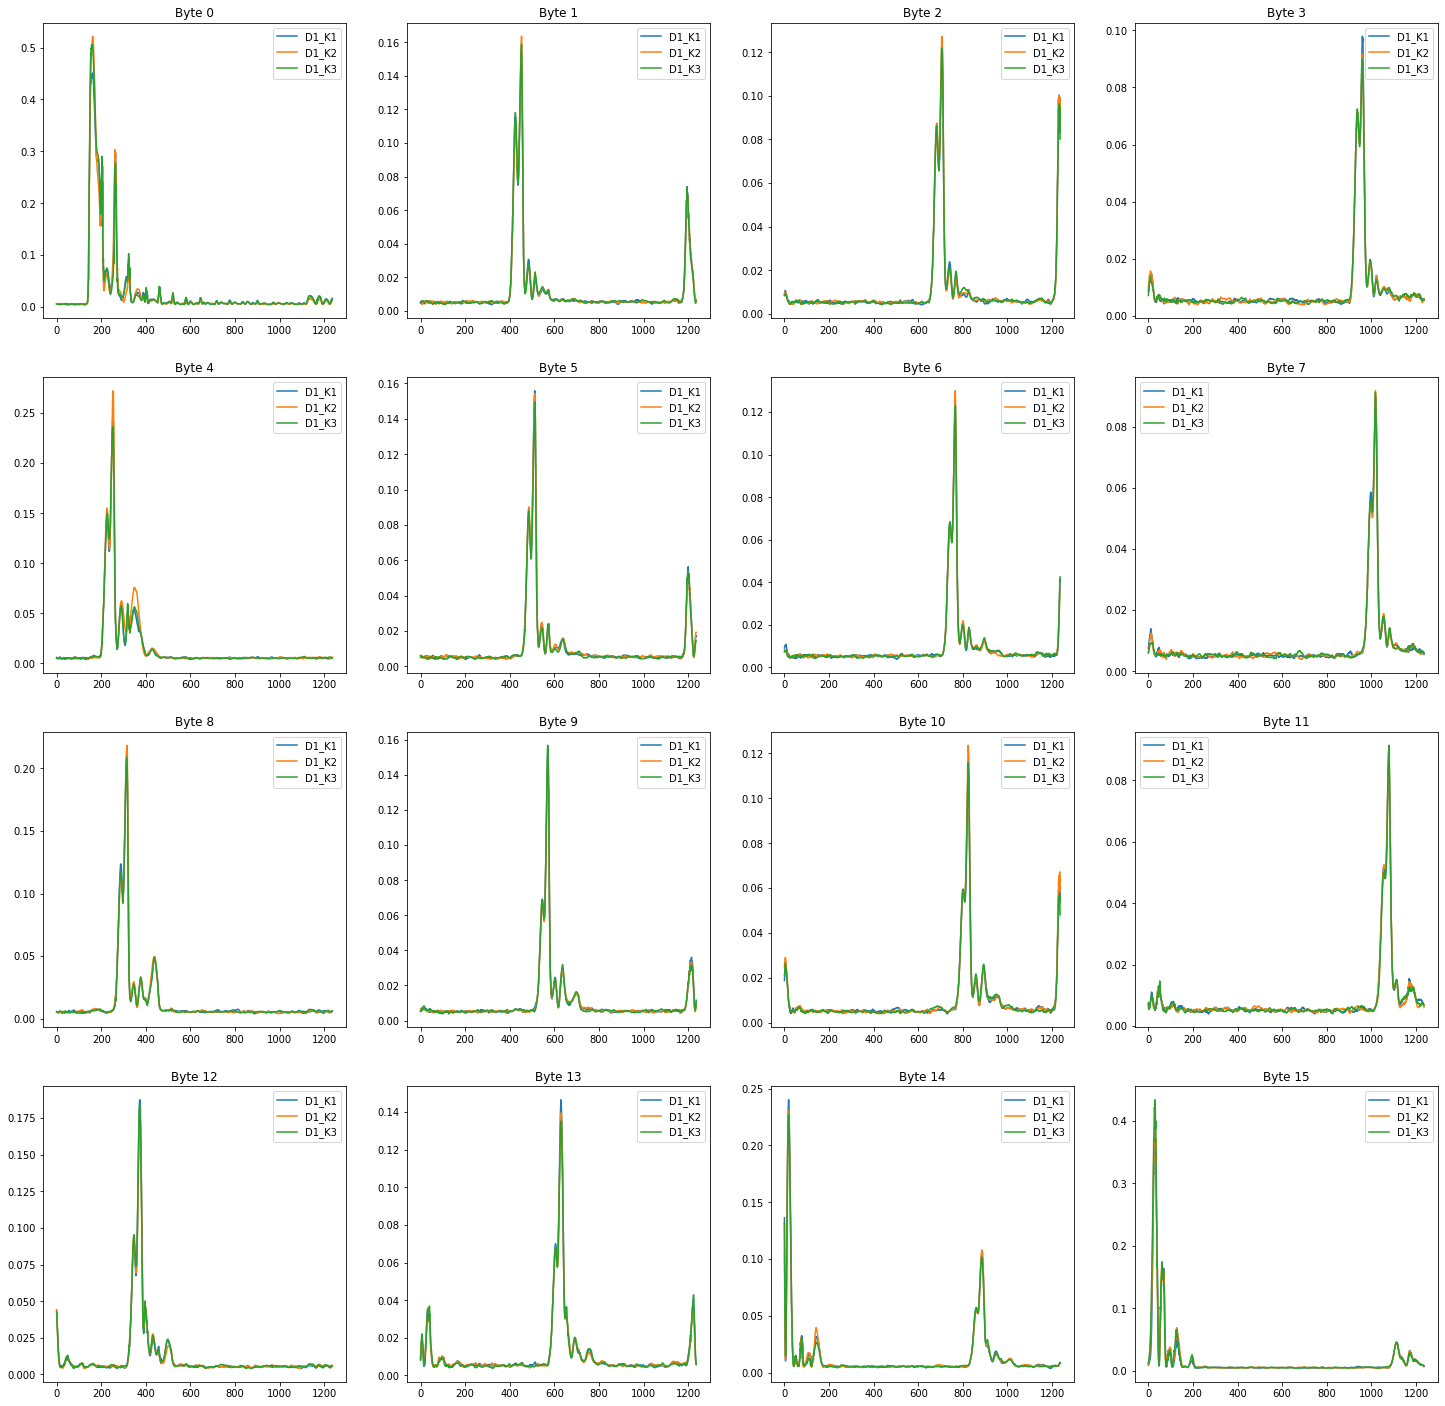

100%|██████████| 16/16 [00:11<00:00,  1.36it/s]


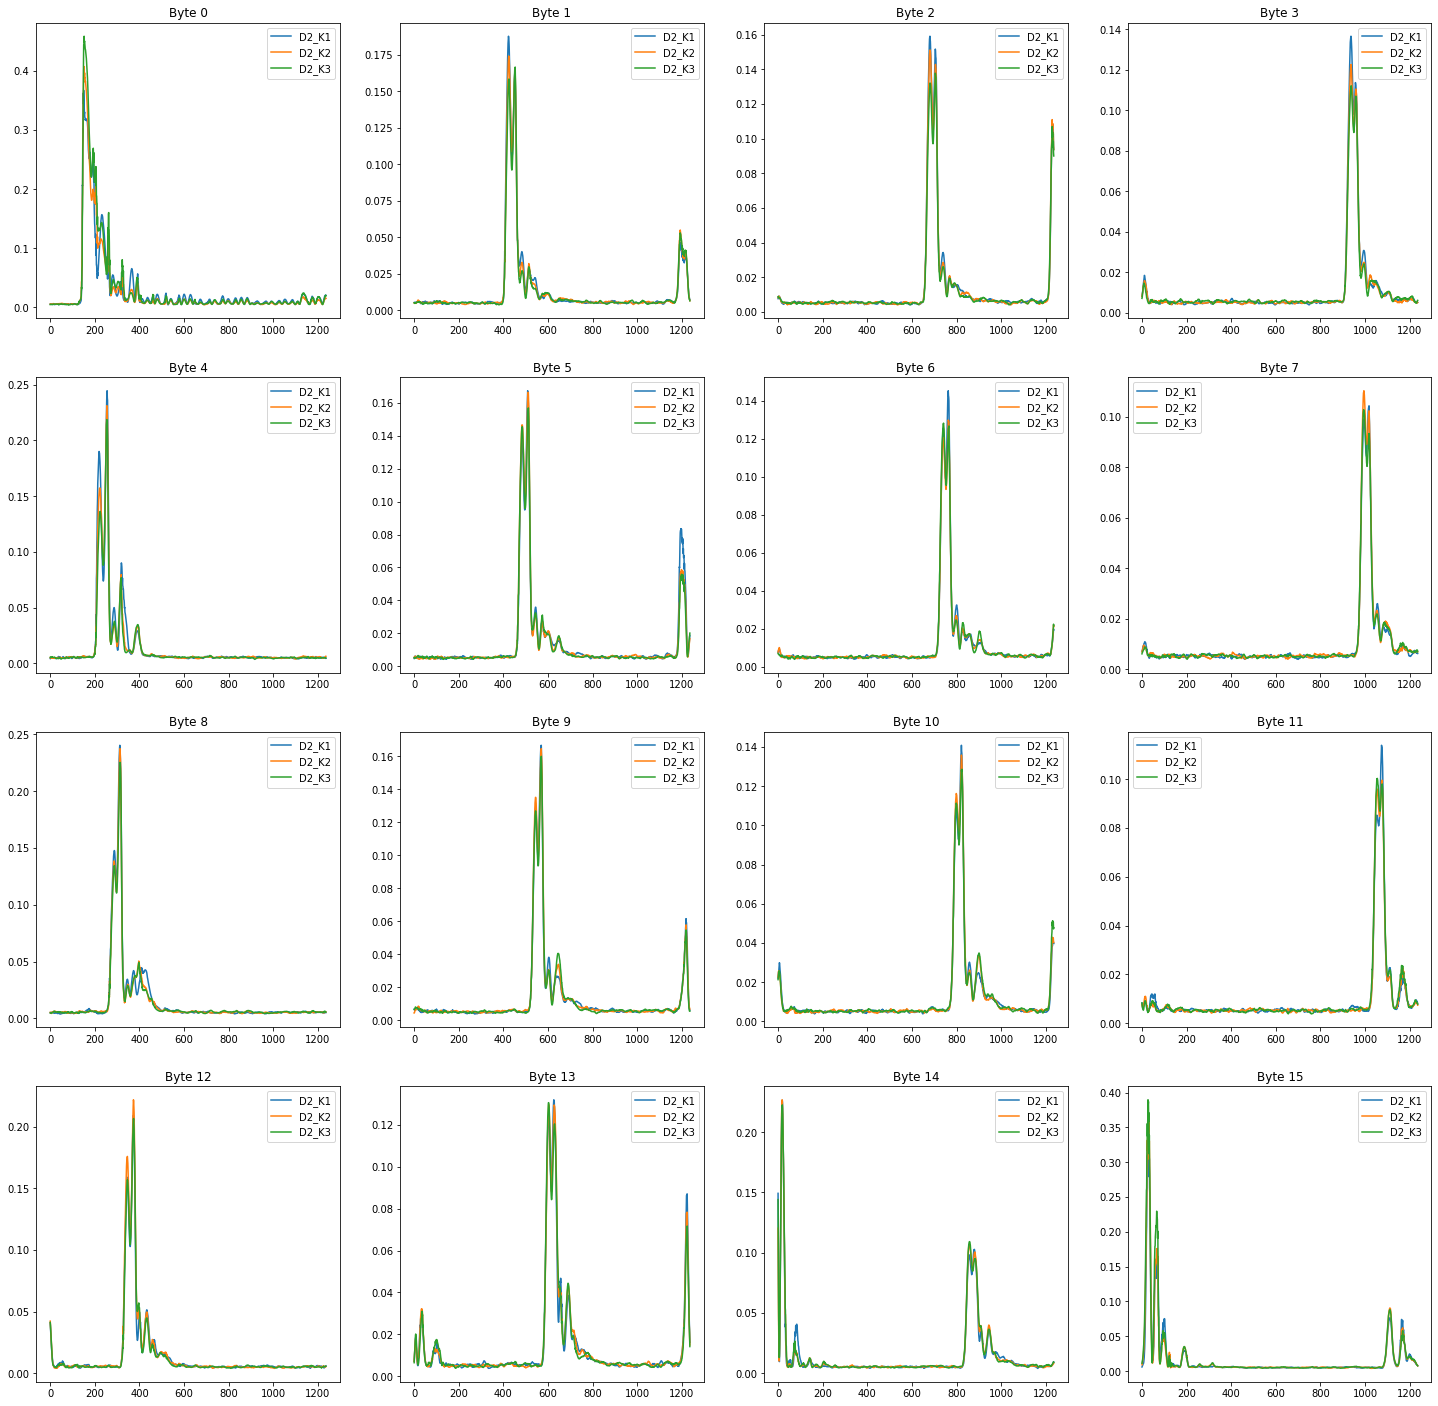

In [7]:
figures = {}

for d, config in nicv_same_device.items():
    exp_trace_handlers = {c: trace_handlers[c] for c in config}
    figure = plot_nicv_all_bytes(exp_trace_handlers)
    figures[d] = figure

In [8]:
for d, figure in figures.items():
    figure.savefig(f'../../MDM32/notebooks/images/NICV_same_device_{d}.png', bbox_inches='tight', dpi=600)

## NICV - Different Device, Same Key

100%|██████████| 16/16 [00:07<00:00,  2.05it/s]


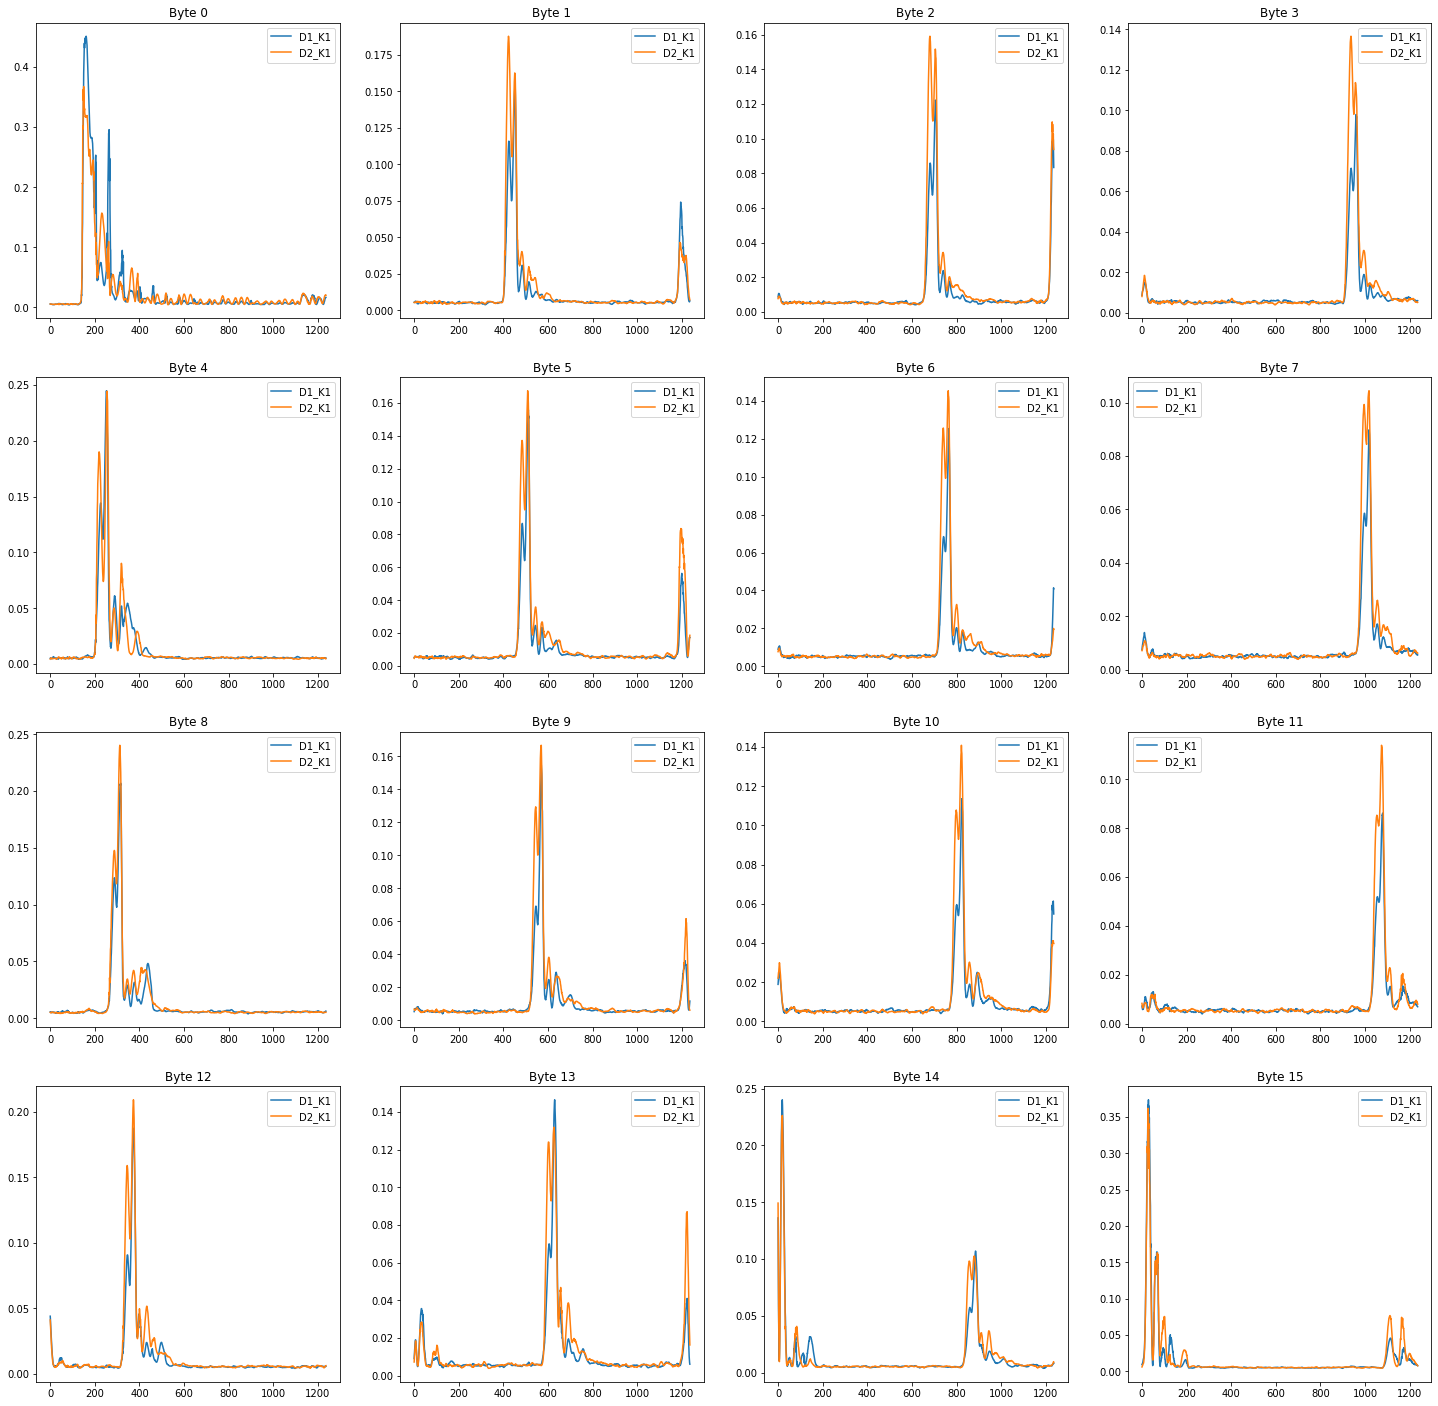

100%|██████████| 16/16 [00:07<00:00,  2.03it/s]


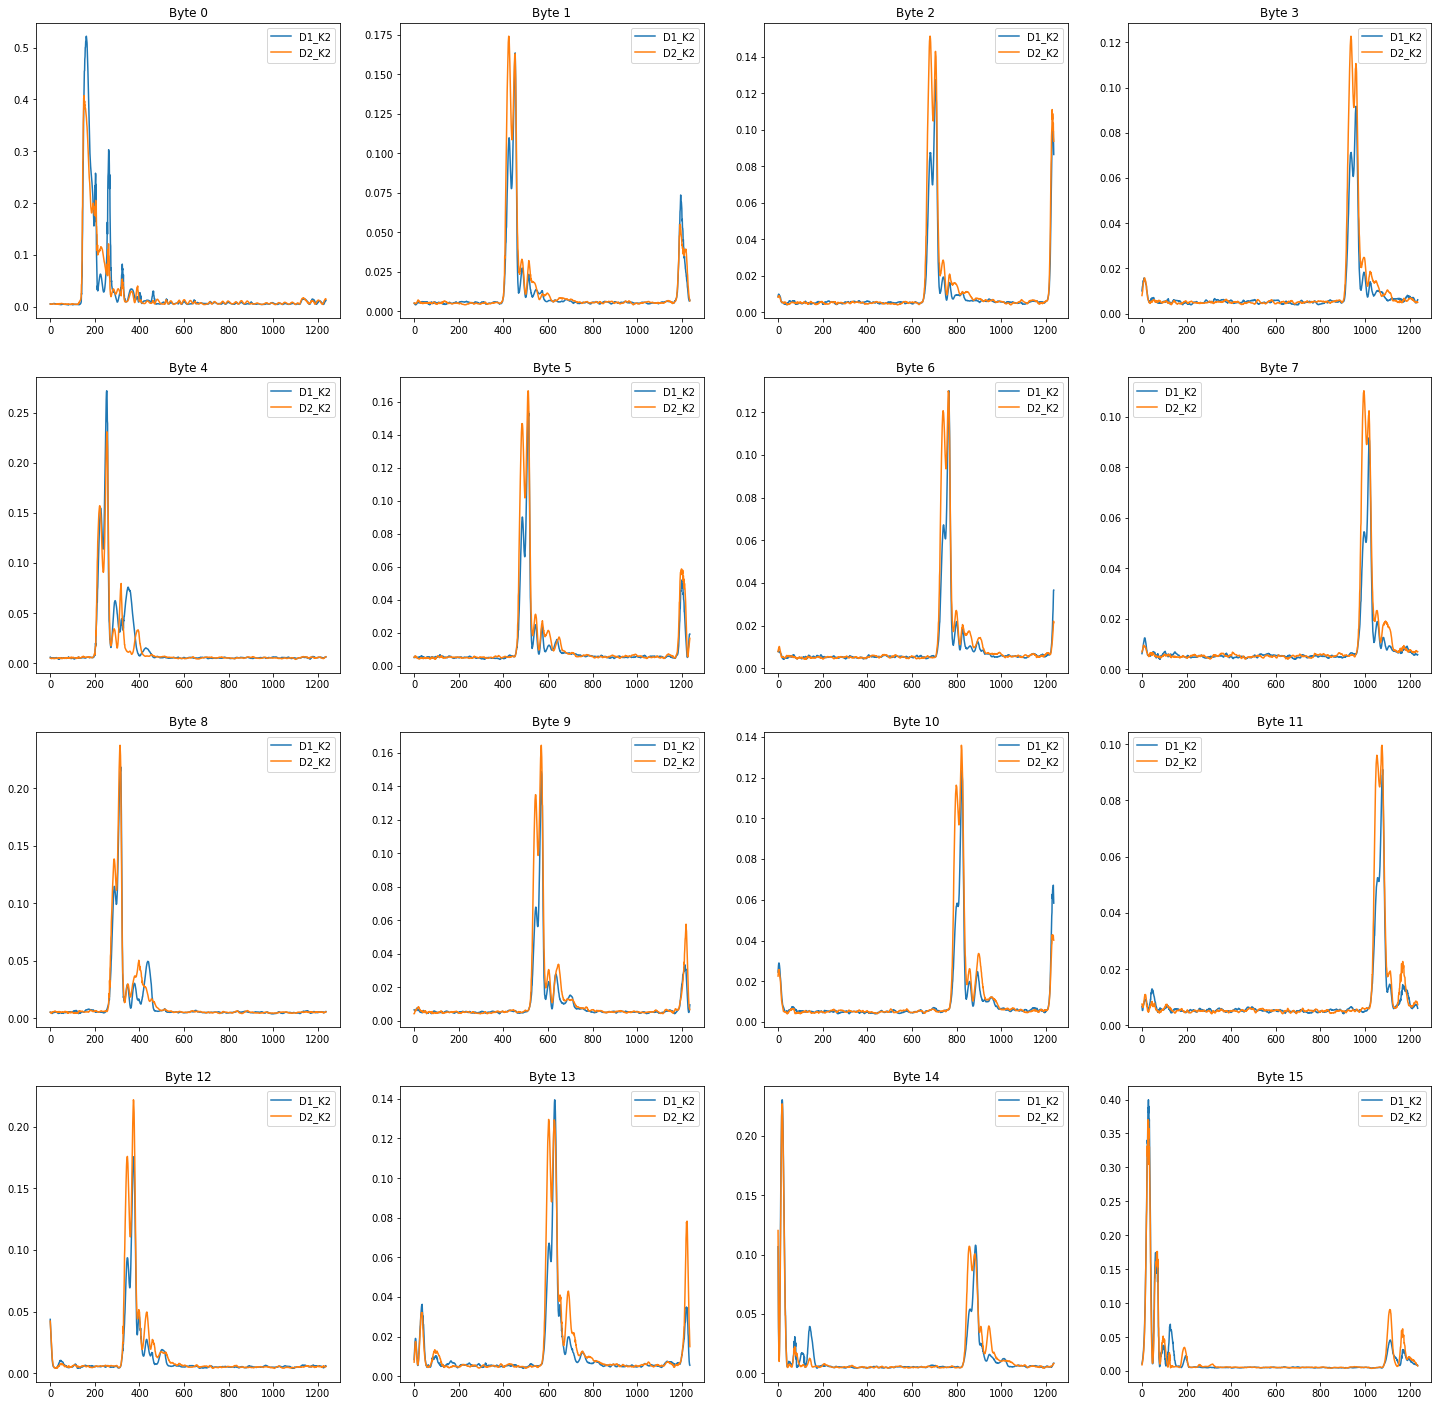

100%|██████████| 16/16 [00:07<00:00,  2.06it/s]


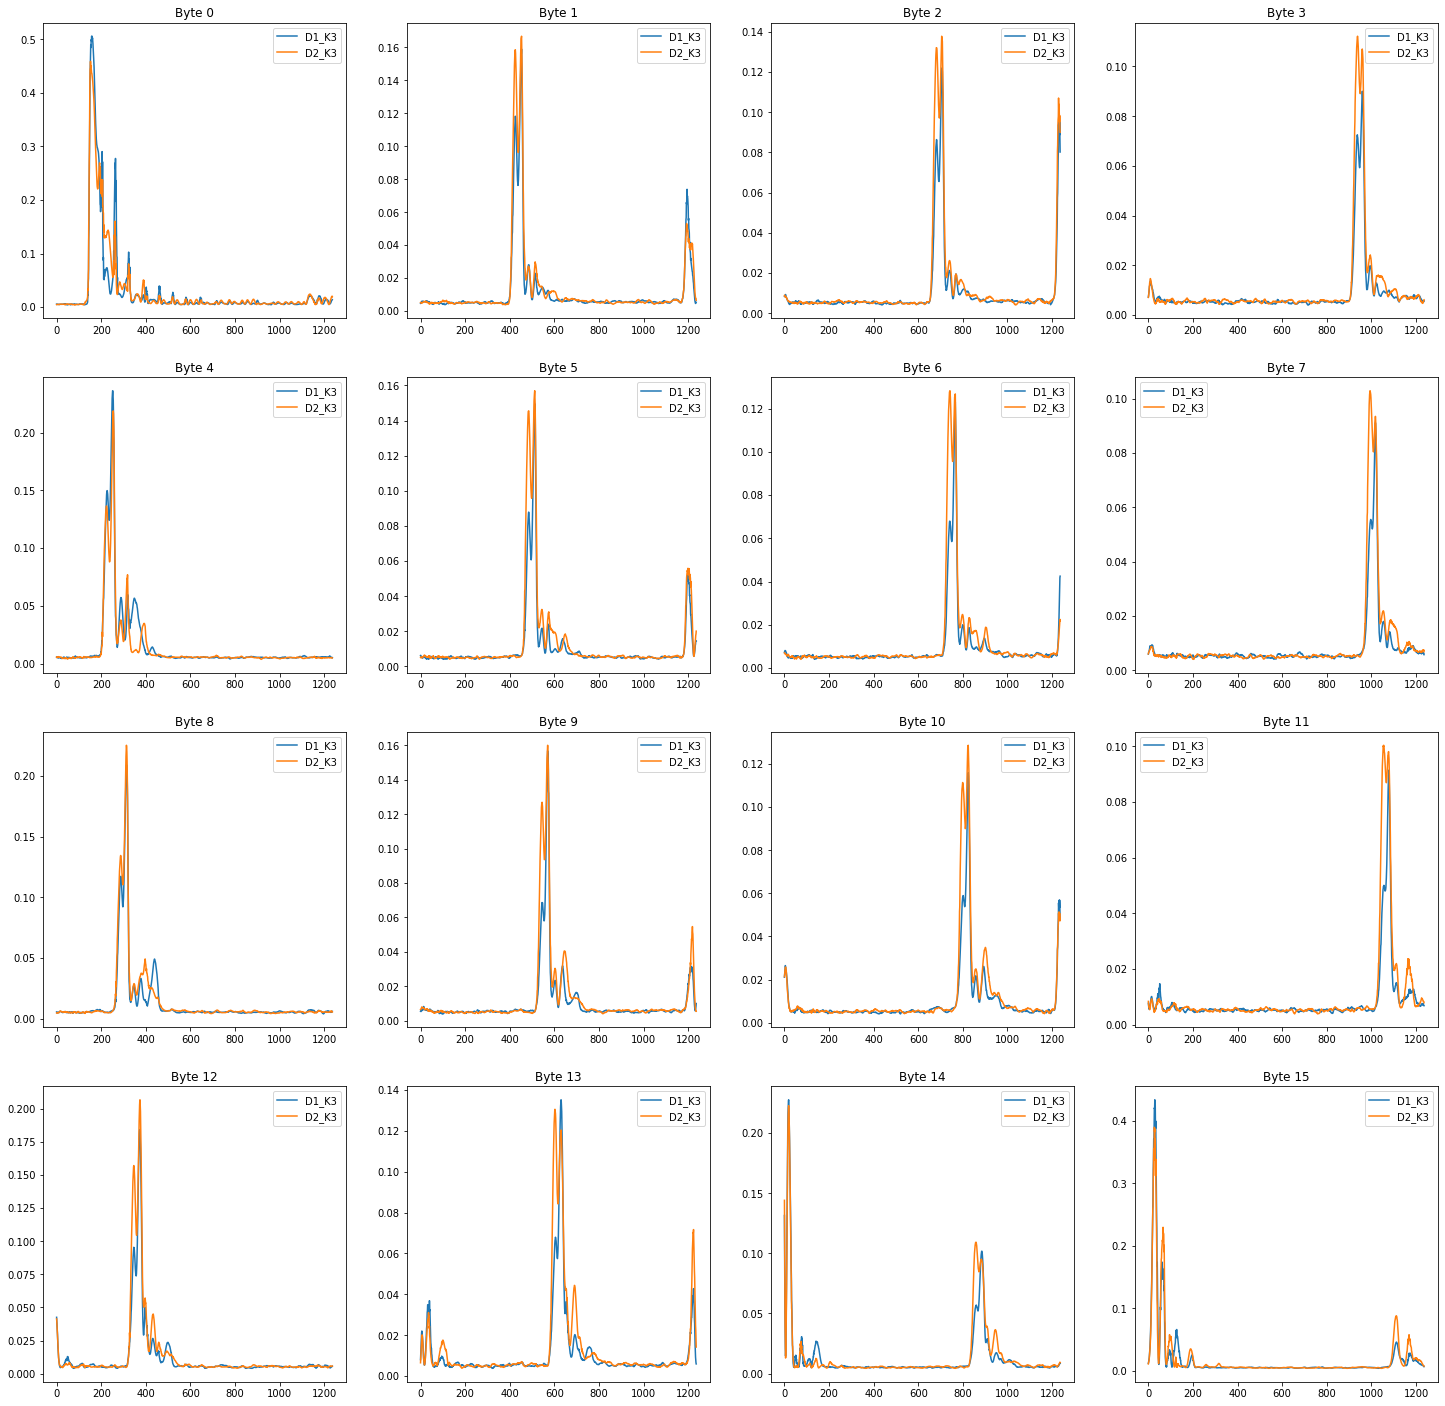

In [9]:
figures = {}

for k, config in nicv_same_key.items():
    exp_trace_handlers = {c: trace_handlers[c] for c in config}
    figure = plot_nicv_all_bytes(exp_trace_handlers)
    figures[k] = figure

In [10]:
for k, figure in figures.items():
    figure.savefig(f'../../MDM32/notebooks/images/NICV_same_key_{k}.png', bbox_inches='tight', dpi=600)

## NICV - All different Device-Key configurations

100%|██████████| 16/16 [00:23<00:00,  1.47s/it]


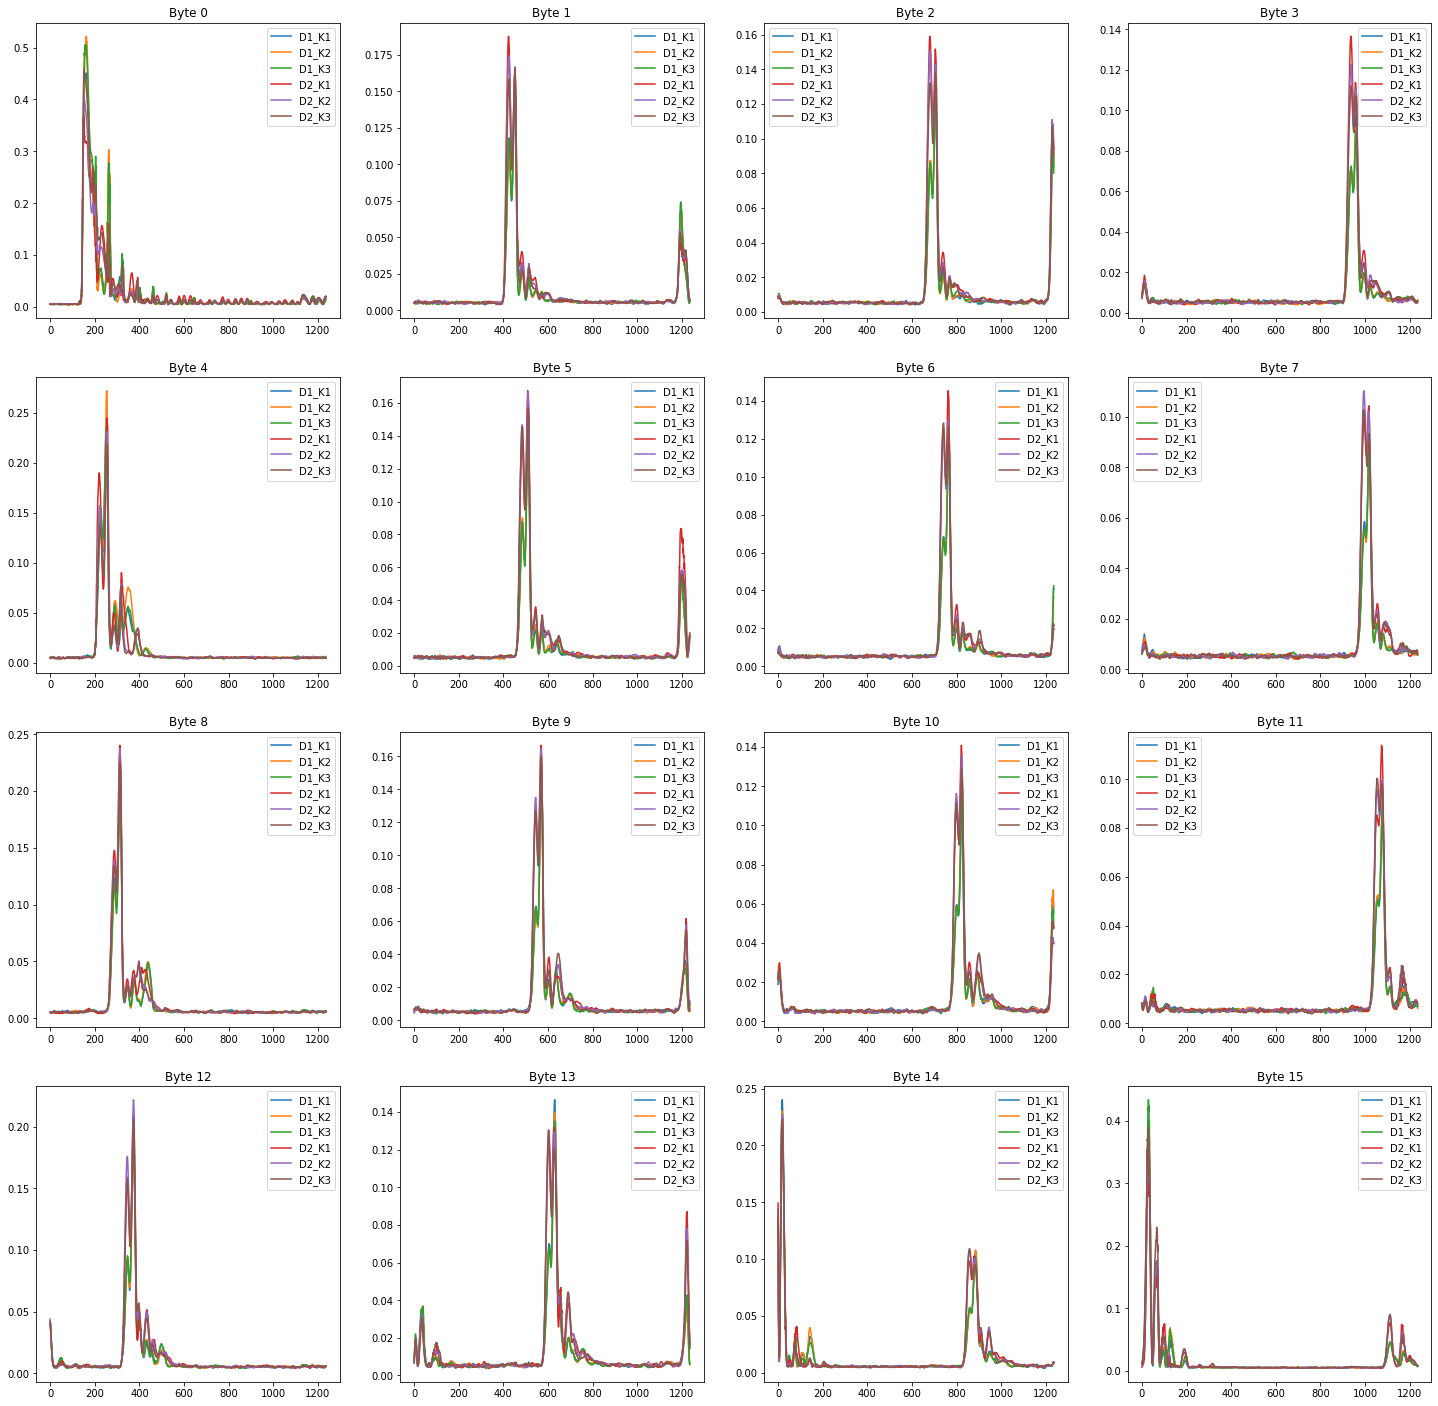

In [11]:
exp_trace_handlers = {config: trace_handlers[config] for config in nicv_all_config}

figure = plot_nicv_all_bytes(exp_trace_handlers)

This result proves that considering different devices and key produces small changes in the leakages, even if the implementation of the encryption algorithm is the same.

Indeed, considering a single plot, the trend that is followed by the leakages of each Device-Key configuration is essentially the same, while the values of the leakages change.

This is true for each key-byte.

### Save the figure as PNG

In [12]:
figure.savefig('../../MDM32/notebooks/images/NICV_all_config.png', bbox_inches='tight', dpi=600)